<h2 style='color:purple' align='center'>Naive Bayes Tutorial Part 1: Predicting survival from titanic crash</h2>

In [1]:
import pandas as pd

This code imports the pandas library and assigns it an alias pd, which is commonly used for this library in Python. The pandas library provides tools for data manipulation and analysis.

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


The above code reads the "titanic.csv" file using pandas' read_csv function and stores the data in a pandas dataframe called df. It then displays the first 5 rows of the dataframe using the head() method.

In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


This code reads in the Titanic dataset using pandas and drops some columns deemed unnecessary for the analysis. Specifically, it drops the 'PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', and 'Embarked' columns using the drop() method of the pandas DataFrame. The axis='columns' argument specifies that we want to drop columns rather than rows. The inplace=True argument specifies that we want to modify the DataFrame in place, rather than creating a new copy. Finally, the head() method is used to display the first few rows of the modified DataFrame.

In [4]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

This code creates two new DataFrames:

inputs: a DataFrame containing all columns of df except for the 'Survived' column. This will be used as the input for the model.
target: a DataFrame containing only the 'Survived' column of df. This will be used as the target variable, i.e. the variable that we want the model to predict.
Here is the documentation for this code:

Function: DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

Parameters:

labels: single label or list-like. Index or column labels to drop.
axis: int or str. Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').
index: single label or list-like. Alternative to specifying axis (labels, axis=0 is equivalent to index=labels).
columns: single label or list-like. Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
level: int or level name. For MultiIndex, level from which the labels will be removed.
inplace: bool. If True, modifies the DataFrame in place (do not create a new object).
errors: str. If 'raise', raises an error if any of the specified labels are not found in the DataFrame. If 'ignore', any non-existent labels are silently ignored.
Returns:

DataFrame. A new DataFrame with the specified labels dropped. If inplace=True, returns None.
In this specific code, the labels parameter is set to a list of column names that we want to drop from the DataFrame df. The axis parameter is set to 'columns' to indicate that we want to drop columns, rather than rows. The inplace parameter is set to True to modify df in place, rather than creating a new object.

The next two lines of code create two new DataFrames:

inputs: a DataFrame containing all columns of df except for the 'Survived' column. This will be used as the input for the model.
target: a DataFrame containing only the 'Survived' column of df. This will be used as the target variable, i.e. the variable that we want the model to predict.

In [5]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

,female,male
0,0,1
1,1,0
2,1,0


The code pd.get_dummies(inputs.Sex) creates dummy variables for the 'Sex' column in the inputs DataFrame. It creates two new columns 'female' and 'male' with binary values (0 or 1) based on whether the passenger is female or male.

The head() method is used to display the first three rows of the resulting DataFrame.

The commented line #inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2}) is an alternative way of encoding the 'Sex' column using integers. Here, 'male' is encoded as 1 and 'female' is encoded as 2. However, this approach is not used in the current code, as pd.get_dummies() has already been used to create dummy variables.

In [6]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


This code creates dummy variables for the 'Sex' column in the inputs dataframe using the pd.get_dummies() function, which creates a new dataframe with binary variables for each unique value in the 'Sex' column (i.e. male or female). The concat() function is then used to concatenate the new dataframe of dummy variables with the original inputs dataframe along the columns axis. This is done in order to replace the original 'Sex' column with the new binary variables for each observation in the dataset.

The resulting inputs dataframe will have additional columns for the new binary variables, representing each unique value in the original 'Sex' column, and those columns will have a value of 1 if the corresponding observation belongs to that value, and 0 otherwise.

The original commented line of code #inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2}) would have converted the 'Sex' column to numerical values (1 for male and 2 for female) using the map() function, but this approach is less flexible than using dummy variables and is not recommended for categorical data with more than two unique values.

**I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female**

In [7]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [8]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

This line of code returns the column names where there are missing values (NaN) in the inputs DataFrame.

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


This line of code fills in the missing values in the 'Age' column of the dataframe 'inputs' with the mean age value of all passengers.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

This code is using the train_test_split function from the sklearn.model_selection module to split the inputs and target data into training and testing sets.

The test_size parameter is set to 0.3, which means that 30% of the data will be used for testing and 70% for training. The resulting splits are assigned to X_train, X_test, y_train, and y_test variables.

Splits arrays or matrices into random train and test subsets.

Parameters:

*arrays: sequence of indexables with same length / shape[0]
test_size: float or int, optional (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
If int, represents the absolute number of test samples.
train_size: float or int, optional (default=None)
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split.
If int, represents the absolute number of train samples.
random_state: int or RandomState instance, optional (default=None)
Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
shuffle: bool, optional (default=True)
Whether or not to shuffle the data before splitting.
stratify: array-like, optional (default=None)
If not None, data is split in a stratified fashion, using this as the class labels.
Returns:

splitting: list, length=2 * len(arrays)
List containing train-test split of inputs and target as follows:
[train-test split of first array, train-test split of second array, ..., train-test split of last array]





In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


GaussianNB is a class in the sklearn.naive_bayes module that implements the Gaussian Naive Bayes algorithm for classification tasks. This algorithm is based on the Bayes theorem and assumes that the features are independent of each other. It is commonly used for classification tasks where the input variables are continuous.

In the above code, we have imported the GaussianNB class from the sklearn.naive_bayes module to create a Naive Bayes model for our dataset. We will use this model to train on the training data and predict on the test data.

In [13]:
model.fit(X_train,y_train)

GaussianNB()

Fits the Gaussian Naive Bayes model to the training data.

Input:

X_train : array-like or sparse matrix of shape (n_samples, n_features)
The training input samples.
y_train : array-like of shape (n_samples,)
The target values (class labels) corresponding to X_train.
Output:

GaussianNB(): Returns an instance of self.

In [14]:
model.score(X_test,y_test)

0.7574626865671642

The score method of the trained GaussianNB model returns the mean accuracy on the given test data and labels. Here, it returns the accuracy of the model on the test set.

This code computes the mean accuracy of the trained GaussianNB model on the test set X_test and the corresponding labels y_test. It returns a float value that represents the accuracy of the model. The accuracy is defined as the ratio of correctly classified instances to the total number of instances.

In [15]:
X_test[0:10]

,Pclass,Age,Fare,female
465,3,38.000000,7.0500,0
773,3,29.699118,7.2250,0
848,2,28.000000,33.0000,0
785,3,25.000000,7.2500,0
184,3,4.000000,22.0250,1
248,1,37.000000,52.5542,0
65,3,29.699118,15.2458,0
92,1,46.000000,61.1750,0
403,3,28.000000,15.8500,0
823,3,27.000000,12.4750,1


In [16]:
y_test[0:10]

C:\Users\samra\AppData\Local\Temp\ipykernel_3296\2966258366.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[0:10]


465    0
773    0
848    0
785    0
184    1
248    1
65     1
92     0
403    0
823    1
Name: Survived, dtype: int64

In [17]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

This code predicts the survival outcome of the first 10 passengers in the test set using the trained Naive Bayes model.

The model.predict(X_test[0:10]) function takes a slice of the first 10 rows of the X_test dataframe and predicts the survival outcome for each of those passengers based on their features. The predicted values are returned as an array of 1's (survived) and 0's (not survived).

In [18]:
model.predict_proba(X_test[:10])

array([[0.96999311, 0.03000689],
       [0.96944963, 0.03055037],
       [0.92928493, 0.07071507],
       [0.96782343, 0.03217657],
       [0.22542608, 0.77457392],
       [0.72110915, 0.27889085],
       [0.96994834, 0.03005166],
       [0.6492535 , 0.3507465 ],
       [0.96946661, 0.03053339],
       [0.36112755, 0.63887245]])

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[131,  32],
       [ 33,  72]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

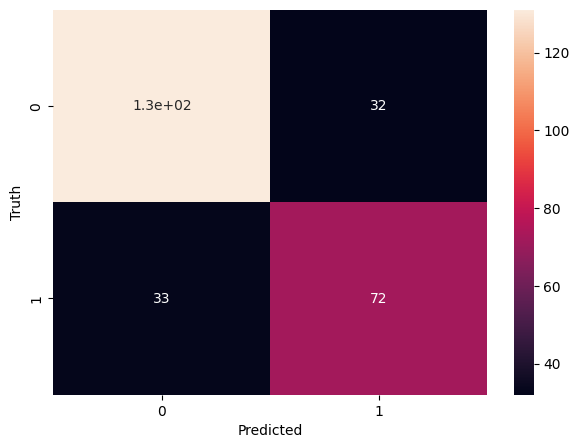

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.69      0.69      0.69       105

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



The predict_proba() method of the GaussianNB class returns the predicted probabilities of each class (0 or 1) for the given test input. Here, we are predicting probabilities for the first 10 test inputs using the predict_proba() method.

**Calculate the score using cross validation**

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.8       , 0.824     , 0.768     , 0.75      , 0.78225806])

cross_val_score is a function in scikit-learn that evaluates a model's performance through cross-validation. It takes in an estimator, the input data, and the target labels, and returns an array of scores obtained by cross-validating the model.

In the code above, we are using cross_val_score to evaluate the performance of the Gaussian Naive Bayes model using 5-fold cross-validation. The function returns an array of 5 scores, each obtained by training the model on 4 folds of the data and evaluating it on the remaining fold.